In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import os
import glob
from scipy.interpolate import interp1d

No data found for algorithm TD3
No data found for algorithm SAC


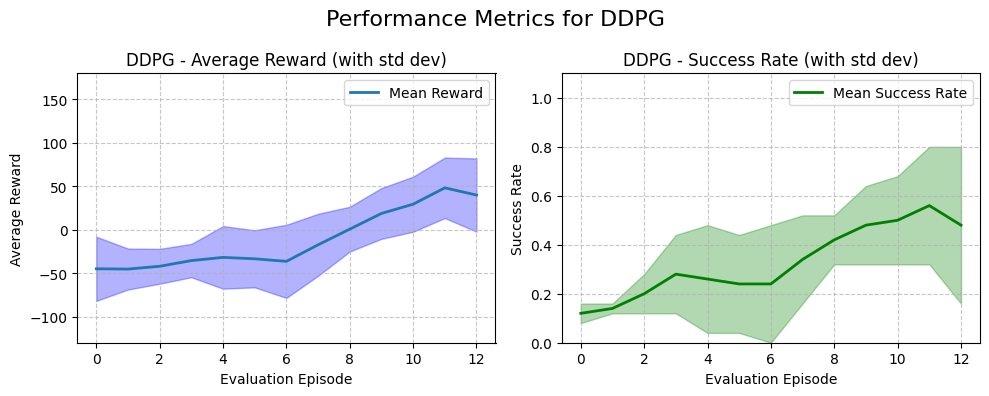

No data found for algorithm ExpD3


In [21]:
def smooth_data(data, window_size=5):
    """Applies a simple moving average with padding."""
    if len(data) < window_size:
        return data  # Avoid smoothing if data is too short
    
    pad = window_size // 2
    padded_data = np.pad(data, (pad, pad), mode='edge')
    smoothed = np.convolve(padded_data, np.ones(window_size)/window_size, mode='valid')
    return smoothed

def plot_subplots(algorithm):
    seeds = [0, 1, 2, 3] 
    os.makedirs(f"./runs/images/{algorithm}", exist_ok=True)

    all_rewards = []
    all_success = []
    
    for seed in seeds:
        try:
            data1 = np.load(f"runs/results/{algorithm}/evaluations_reward_seed{seed}.npy")
            data2 = np.load(f"runs/results/{algorithm}/evaluations_suc_seed{seed}.npy")
            
            # Apply smoothing
            smoothed_reward = smooth_data(data1)
            smoothed_success = smooth_data(data2)
            
            all_rewards.append(smoothed_reward)
            all_success.append(smoothed_success)
        except FileNotFoundError:
            print(f"Warning: Data file for {algorithm} with seed {seed} not found")
    
    # Check if we have any data
    if not all_rewards:
        print(f"No data found for algorithm {algorithm}")
        return
    
    # Make sure all arrays have the same length (use min length to avoid index errors)
    min_length_rewards = min(len(r) for r in all_rewards)
    min_length_success = min(len(s) for s in all_success)
    
    all_rewards = [r[:min_length_rewards] for r in all_rewards]
    all_success = [s[:min_length_success] for s in all_success]
    
    # Convert to numpy arrays
    all_rewards = np.array(all_rewards)
    all_success = np.array(all_success)
    
    # Compute mean and standard deviation (not variance) for both rewards and success
    mean_reward = np.mean(all_rewards, axis=0)
    std_reward = np.std(all_rewards, axis=0)
    
    mean_success = np.mean(all_success, axis=0)
    std_success = np.std(all_success, axis=0)
    
    # Create x-axis for plotting
    x_reward = np.arange(len(mean_reward))
    x_success = np.arange(len(mean_success))
    
    # Plot overall statistics
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot reward with shaded standard deviation
    axes[0].plot(x_reward, mean_reward, label="Mean Reward", linewidth=2)
    axes[0].fill_between(x_reward, mean_reward - std_reward, mean_reward + std_reward, alpha=0.3, color='b')
    axes[0].set_title(f"{algorithm} - Average Reward (with std dev)")
    axes[0].set_xlabel("Evaluation Episode")
    axes[0].set_ylabel("Average Reward")
    axes[0].set_ylim(-130, 180)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend()
    
    # Plot success rate with shaded standard deviation
    axes[1].plot(x_success, mean_success, label="Mean Success Rate", linewidth=2, color='g')
    axes[1].fill_between(x_success, np.maximum(mean_success - std_success, 0), 
                        np.minimum(mean_success + std_success, 1), alpha=0.3, color='g')
    axes[1].set_title(f"{algorithm} - Success Rate (with std dev)")
    axes[1].set_xlabel("Evaluation Episode")
    axes[1].set_ylabel("Success Rate")
    axes[1].set_ylim(0, 1.1)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].legend()
    
    plt.suptitle(f"Performance Metrics for {algorithm}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"./runs/images/{algorithm}/performance.png", dpi=300, bbox_inches='tight')
    plt.show()

# Call the function for different algorithms
algorithms = ["TD3", "SAC", "DDPG", "ExpD3"]
for algo in algorithms:
    plot_subplots(algo)

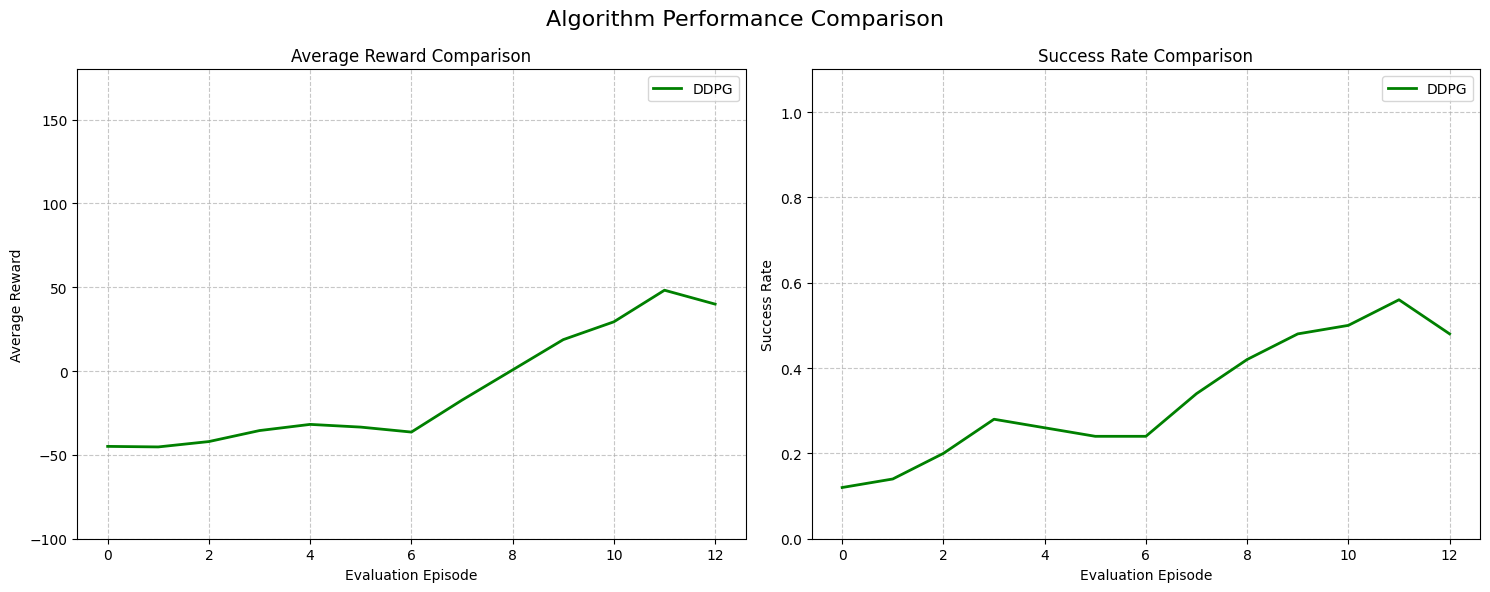

In [22]:
# Plot all algorithms together for comparison
def plot_comparison(algorithms):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    colors = ['b', 'r', 'g', 'm', 'c']
    
    for i, algo in enumerate(algorithms):
        seeds = [0, 1, 2, 3]
        all_rewards = []
        all_success = []
        
        for seed in seeds:
            try:
                data1 = np.load(f"runs/results/{algo}/evaluations_reward_seed{seed}.npy")
                data2 = np.load(f"runs/results/{algo}/evaluations_suc_seed{seed}.npy")
                
                # Apply smoothing
                smoothed_reward = smooth_data(data1)
                smoothed_success = smooth_data(data2)
                
                all_rewards.append(smoothed_reward)
                all_success.append(smoothed_success)
            except FileNotFoundError:
                continue
        
        if not all_rewards:
            continue
            
        # Make sure all arrays have the same length
        min_length_rewards = min(len(r) for r in all_rewards)
        min_length_success = min(len(s) for s in all_success)
        
        all_rewards = [r[:min_length_rewards] for r in all_rewards]
        all_success = [s[:min_length_success] for s in all_success]
        
        # Convert to numpy arrays
        all_rewards = np.array(all_rewards)
        all_success = np.array(all_success)
        
        # Compute statistics
        mean_reward = np.mean(all_rewards, axis=0)
        mean_success = np.mean(all_success, axis=0)
        
        color = colors[i % len(colors)]
        axes[0].plot(mean_reward, label=algo, color=color, linewidth=2)
        axes[1].plot(mean_success, label=algo, color=color, linewidth=2)
    
    axes[0].set_title("Average Reward Comparison")
    axes[0].set_xlabel("Evaluation Episode")
    axes[0].set_ylabel("Average Reward")
    axes[0].set_ylim(-100, 180)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend()
    
    axes[1].set_title("Success Rate Comparison")
    axes[1].set_xlabel("Evaluation Episode")
    axes[1].set_ylabel("Success Rate")
    axes[1].set_ylim(0, 1.1)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].legend()
    
    plt.suptitle("Algorithm Performance Comparison", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"runs/images/algorithm_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()

# Plot comparison of all algorithms
plot_comparison(algorithms)

In [23]:
def plot_trajectory_grid(trajectory_files, save_path=None, show=True, grid_size=(5, 4)):
    """
    Plot multiple trajectories in a grid layout.
    
    Parameters:
    -----------
    trajectory_files : list
        List of paths to NPZ files containing trajectories
    save_path : str, optional
        Path to save the combined figure
    show : bool, optional
        Whether to display the figure
    grid_size : tuple, optional
        Number of rows and columns in the grid (rows, cols)
    """
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()
    
    # Check if we have enough trajectories
    max_trajectories = rows * cols
    if len(trajectory_files) < max_trajectories:
        print(f"Warning: Only {len(trajectory_files)} files provided for a {rows}x{cols} grid.")
    
    # Process each trajectory file
    for i, file_path in enumerate(trajectory_files[:max_trajectories]):
        ax = axes[i]
        
        try:
            # Load the npz file
            if not os.path.exists(file_path):
                ax.text(0.5, 0.5, f"File not found:\n{os.path.basename(file_path)}", 
                        ha='center', va='center', transform=ax.transAxes)
                continue
                
            data = np.load(file_path, allow_pickle=True)
            
            # Plot each trajectory in this file
            for j, key in enumerate(data.files):
                traj = data[key]
                
                # Skip invalid trajectories
                if not isinstance(traj, np.ndarray) or traj.size == 0:
                    continue
                if len(traj.shape) < 2 or traj.shape[1] < 2:
                    continue
                
                # Generate colors for this trajectory
                colors = plt.cm.viridis(np.linspace(0, 1, len(data.files)))
                
                # Plot trajectory
                ax.plot(traj[:, 0], traj[:, 1], '-', color=colors[j], linewidth=1, alpha=0.7)
                ax.plot(traj[0, 0], traj[0, 1], 'o', color=colors[j], markersize=4)
                ax.plot(traj[-1, 0], traj[-1, 1], '*', color=colors[j], markersize=6)
            
            # Add environment elements
            circle1 = Circle((-1, 0), 0.1, color='red', fill=False, linestyle='--')
            ax.add_patch(circle1)
            
            circle2 = Circle((1, 0), 0.15, color='blue', fill=False, linestyle='--')
            ax.add_patch(circle2)
            
            rect_width, rect_height = 0.2, 0.5
            rectangle = Rectangle((-rect_width/2, -rect_height/2), rect_width, rect_height, 
                                 edgecolor='green', facecolor='lightgreen', alpha=0.3)
            ax.add_patch(rectangle)
            
            # Set axis limits and labels
            ax.set_xlim(-1.2, 1.2)
            ax.set_ylim(-1.2, 1.2)
            ax.set_aspect('equal')
            
            # Add title (episode number extracted from filename)
            filename = os.path.basename(file_path)
            episode = filename.split('_')[0]  # Assuming filename format is "X_trajectories.npz"
            ax.set_title(f"Episode {episode}")
            
            # Only add x and y labels for the bottom and left plots
            if i >= (rows-1) * cols:  # Bottom row
                ax.set_xlabel("X Position")
            if i % cols == 0:  # Left column
                ax.set_ylabel("Y Position")
                
            ax.grid(True, linestyle='--', alpha=0.4)
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center', transform=ax.transAxes)
    
    # Hide any unused subplots
    for i in range(len(trajectory_files), max_trajectories):
        axes[i].set_visible(False)
    
    # Add a single legend for the entire figure
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Start Region'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Goal Region'),
        plt.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.3, edgecolor='green', label='Obstacle')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3)
    
    plt.suptitle("Trajectory Evolution", fontsize=16, y=0.995)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for the title and legend
    
    # Save figure if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        #print(f"Grid figure saved to {save_path}")
    
    if show:
        plt.show()
    else:
        plt.close()


In [24]:
# Define all algorithms and seeds to plot
algorithms = ["DDPG", "SAC", "TD3", "ExpD3"]
seeds = [0, 1, 2, 3]

# Loop through each algorithm and seed
for algorithm in algorithms:
    for seed in seeds:
        print(f"Processing {algorithm} with seed {seed}...")
        
        # Sort files numerically by episode number
        trajectory_files = glob.glob(f"./runs/trajectories/{algorithm}/seed{seed}/*_trajectories.npz")
        if not trajectory_files:
            print(f"  No trajectory files found for {algorithm}/seed{seed}")
            continue
            
        trajectory_files.sort(key=lambda x: int(os.path.basename(x).split('_')[0]))
        
        # Limit to 20 files if there are more (to fit 5x4 grid)
        if len(trajectory_files) > 20:
            print(f"  Found {len(trajectory_files)} files, using only the first 20")
            trajectory_files = trajectory_files[:20]
        
        # Create save path for this algorithm and seed
        save_path = f"./runs/images/{algorithm}/seed{seed}_trajectory_grid.png"
        
        # Plot the grid
        plot_trajectory_grid(
            trajectory_files,
            save_path=save_path,
            grid_size=(5, 4),
            show=False
        )

        print("Finished")


Processing DDPG with seed 0...
  No trajectory files found for DDPG/seed0
Processing DDPG with seed 1...
  No trajectory files found for DDPG/seed1
Processing DDPG with seed 2...
  No trajectory files found for DDPG/seed2
Processing DDPG with seed 3...
  No trajectory files found for DDPG/seed3
Processing SAC with seed 0...
  No trajectory files found for SAC/seed0
Processing SAC with seed 1...
  No trajectory files found for SAC/seed1
Processing SAC with seed 2...
  No trajectory files found for SAC/seed2
Processing SAC with seed 3...
  No trajectory files found for SAC/seed3
Processing TD3 with seed 0...
  No trajectory files found for TD3/seed0
Processing TD3 with seed 1...
  No trajectory files found for TD3/seed1
Processing TD3 with seed 2...
  No trajectory files found for TD3/seed2
Processing TD3 with seed 3...
  No trajectory files found for TD3/seed3
Processing ExpD3 with seed 0...
  No trajectory files found for ExpD3/seed0
Processing ExpD3 with seed 1...
  No trajectory file

In [25]:
def classify_trajectory_paths(trajectory_files, num_points=100):
    """
    Analyze trajectory statistics and classify trajectories as passing left or right of obstacle.
    
    Parameters:
    -----------
    trajectory_files : list
        List of paths to NPZ files containing trajectories
    num_points : int, optional
        Number of points to resample each trajectory to for consistent comparison
        
    Returns:
    --------
    dict: Statistics dictionary containing mean and variance trajectories for left and right paths
    """
    all_trajectories = []
    left_trajectories = []
    right_trajectories = []
    
    # Process each trajectory file
    for file_path in trajectory_files:
        if not os.path.exists(file_path):
            continue
            
        try:
            data = np.load(file_path, allow_pickle=True)
            
            # Process each trajectory in this file
            for key in data.files:
                traj = data[key]
                
                # Skip invalid trajectories
                if not isinstance(traj, np.ndarray) or traj.size == 0:
                    continue
                if len(traj.shape) < 2 or traj.shape[1] < 2:
                    continue
                    
                # Only include trajectories that reach near the goal
                final_point = traj[-1, :2]
                distance_to_goal = np.sqrt((final_point[0] - 1.0)**2 + (final_point[1] - 0.0)**2)
                
                # Only include successful trajectories (those that get close to the goal)
                if distance_to_goal <= 0.2:  # Within 0.2 units of the goal at (1,0)
                    # Resample trajectory to fixed number of points for consistent comparison
                    resampled_traj = resample_trajectory(traj[:, :2], num_points)
                    all_trajectories.append(resampled_traj)
                    
                    # Classify as left or right path based on whether the trajectory passes
                    # above or below the obstacle at (0,0)
                    # Find the point where trajectory crosses the x=0 line (obstacle center)
                    for i in range(len(resampled_traj) - 1):
                        if (resampled_traj[i, 0] <= 0 and resampled_traj[i+1, 0] > 0) or \
                           (resampled_traj[i, 0] >= 0 and resampled_traj[i+1, 0] < 0):
                            # Linear interpolation to find the y value at x=0
                            x1, y1 = resampled_traj[i]
                            x2, y2 = resampled_traj[i+1]
                            
                            # Avoid division by zero
                            if x1 == x2:
                                y_at_x0 = y1
                            else:
                                y_at_x0 = y1 + (y2 - y1) * (0 - x1) / (x2 - x1)
                            
                            # Determine if path is above (left) or below (right) the obstacle
                            # Using obstacle height/2 = 0.1 as the threshold
                            if y_at_x0 > 0.1:
                                left_trajectories.append(resampled_traj)
                                break
                            elif y_at_x0 < -0.1:
                                right_trajectories.append(resampled_traj)
                                break
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Convert to numpy arrays for statistics
    all_trajectories = np.array(all_trajectories) if all_trajectories else np.array([])
    left_trajectories = np.array(left_trajectories) if left_trajectories else np.array([])
    right_trajectories = np.array(right_trajectories) if right_trajectories else np.array([])
    
    # Calculate statistics for all trajectories
    stats = {}
    stats['all'] = calculate_trajectory_statistics(all_trajectories)
    stats['left'] = calculate_trajectory_statistics(left_trajectories)
    stats['right'] = calculate_trajectory_statistics(right_trajectories)
    
    return stats

def calculate_trajectory_statistics(trajectories):
    """Calculate statistics for a group of trajectories."""
    if len(trajectories) == 0:
        return None
    
    # Calculate statistics
    mean_trajectory = np.mean(trajectories, axis=0)
    var_trajectory = np.var(trajectories, axis=0)
    std_trajectory = np.std(trajectories, axis=0)
    
    # Calculate distance metrics
    path_lengths = [calculate_path_length(traj) for traj in trajectories]
    mean_path_length = np.mean(path_lengths)
    std_path_length = np.std(path_lengths)
    
    return {
        'mean_trajectory': mean_trajectory,
        'var_trajectory': var_trajectory,
        'std_trajectory': std_trajectory,
        'all_trajectories': trajectories,
        'path_lengths': path_lengths,
        'mean_path_length': mean_path_length,
        'std_path_length': std_path_length,
        'num_trajectories': len(trajectories)
    }

def resample_trajectory(trajectory, num_points):
    """Resample a trajectory to have a fixed number of points."""
    # Get the cumulative distance along the trajectory
    distances = np.zeros(len(trajectory))
    for i in range(1, len(trajectory)):
        distances[i] = distances[i-1] + np.linalg.norm(trajectory[i] - trajectory[i-1])
    
    # If trajectory is a single point or all points are the same
    if distances[-1] == 0:
        return np.tile(trajectory[0], (num_points, 1))
    
    # Normalize the distances to [0, 1]
    normalized_distances = distances / distances[-1]
    
    # Create interpolation functions for x and y
    fx = interp1d(normalized_distances, trajectory[:, 0], kind='linear')
    fy = interp1d(normalized_distances, trajectory[:, 1], kind='linear')
    
    # Create new evenly spaced points
    new_distances = np.linspace(0, 1, num_points)
    
    # Interpolate new points
    new_trajectory = np.column_stack((fx(new_distances), fy(new_distances)))
    
    return new_trajectory

def calculate_path_length(trajectory):
    """Calculate the total path length of a trajectory."""
    length = 0
    for i in range(1, len(trajectory)):
        length += np.linalg.norm(trajectory[i] - trajectory[i-1])
    return length

def plot_classified_trajectories(stats, title="Classified Trajectory Paths", save_path=None):
    """
    Plot trajectory statistics including mean paths and variances for left and right paths.
    
    Parameters:
    -----------
    stats : dict
        Dictionary containing trajectory statistics for all, left, and right trajectories
    title : str, optional
        Title for the plot
    save_path : str, optional
        Path to save the figure
    """
    if (stats['all'] is None or stats['all']['num_trajectories'] == 0):
        print("No valid trajectories to plot statistics for")
        return
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot individual trajectories with low alpha for background
    if stats['left'] is not None and stats['left']['num_trajectories'] > 0:
        left_trajectories = stats['left']['all_trajectories']
        max_background_trajectories = min(20, len(left_trajectories))
        indices = np.linspace(0, len(left_trajectories)-1, max_background_trajectories, dtype=int)
        for i in indices:
            ax.plot(left_trajectories[i, :, 0], left_trajectories[i, :, 1], 'b-', alpha=0.1)
    
    if stats['right'] is not None and stats['right']['num_trajectories'] > 0:
        right_trajectories = stats['right']['all_trajectories']
        max_background_trajectories = min(20, len(right_trajectories))
        indices = np.linspace(0, len(right_trajectories)-1, max_background_trajectories, dtype=int)
        for i in indices:
            ax.plot(right_trajectories[i, :, 0], right_trajectories[i, :, 1], 'r-', alpha=0.1)
    
    # Plot mean trajectories
    if stats['left'] is not None and stats['left']['num_trajectories'] > 0:
        mean_traj = stats['left']['mean_trajectory']
        std_traj = stats['left']['std_trajectory']
        ax.plot(mean_traj[:, 0], mean_traj[:, 1], 'b-', linewidth=2, label='Mean Left Path')
        
        # Plot variance as shaded region
        ax.fill_between(
            mean_traj[:, 0],
            mean_traj[:, 1] - std_traj[:, 1],
            mean_traj[:, 1] + std_traj[:, 1],
            alpha=0.2, color='blue', label='Left Path ±1 Std Dev'
        )
    
    if stats['right'] is not None and stats['right']['num_trajectories'] > 0:
        mean_traj = stats['right']['mean_trajectory']
        std_traj = stats['right']['std_trajectory']
        ax.plot(mean_traj[:, 0], mean_traj[:, 1], 'r-', linewidth=2, label='Mean Right Path')
        
        # Plot variance as shaded region
        ax.fill_between(
            mean_traj[:, 0],
            mean_traj[:, 1] - std_traj[:, 1],
            mean_traj[:, 1] + std_traj[:, 1],
            alpha=0.2, color='red', label='Right Path ±1 Std Dev'
        )
    
    # Add environment elements
    circle1 = Circle((-1, 0), 0.1, color='black', fill=False, linestyle='--', label='Start Region')
    ax.add_patch(circle1)
    
    circle2 = Circle((1, 0), 0.15, color='green', fill=False, linestyle='--', label='Goal Region')
    ax.add_patch(circle2)
    
    rect_width, rect_height = 0.5, 0.2
    rectangle = Rectangle((-rect_width/2, -rect_height/2), rect_width, rect_height, 
                        edgecolor='black', facecolor='gray', alpha=0.5, label='Obstacle')
    ax.add_patch(rectangle)
    
    # Add statistics as text
    stats_text = []
    stats_text.append(f"Total Trajectories: {stats['all']['num_trajectories']}")
    
    if stats['left'] is not None and stats['left']['num_trajectories'] > 0:
        stats_text.append(f"\nLeft Path Trajectories: {stats['left']['num_trajectories']}")
        stats_text.append(f"Left Path Length: {stats['left']['mean_path_length']:.2f} ± {stats['left']['std_path_length']:.2f}")
        stats_text.append(f"Left Path Max Variance: ({np.max(stats['left']['var_trajectory'][:, 0]):.4f}, {np.max(stats['left']['var_trajectory'][:, 1]):.4f})")
    
    if stats['right'] is not None and stats['right']['num_trajectories'] > 0:
        stats_text.append(f"\nRight Path Trajectories: {stats['right']['num_trajectories']}")
        stats_text.append(f"Right Path Length: {stats['right']['mean_path_length']:.2f} ± {stats['right']['std_path_length']:.2f}")
        stats_text.append(f"Right Path Max Variance: ({np.max(stats['right']['var_trajectory'][:, 0]):.4f}, {np.max(stats['right']['var_trajectory'][:, 1]):.4f})")
    
    ax.text(0.02, 0.98, "\n".join(stats_text), transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Set plot properties
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower right')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Classified trajectories plot saved to {save_path}")
    
    plt.show()

def compare_classified_algorithms():
    """Compare left/right trajectory statistics across all algorithms and seeds."""
    algorithms = ["DDPG", "SAC", "TD3", "ExpD3"]
    seeds = [0, 1, 2, 3]
    
    # Dictionary to store statistics for final comparison
    all_stats = {}
    
    # Create a figure for comparing all algorithms
    fig, axes = plt.subplots(len(algorithms), 3, figsize=(15, len(algorithms)*4))
    
    for i, algorithm in enumerate(algorithms):
        # Get all trajectory files for this algorithm across all seeds
        all_files = []
        for seed in seeds:
            trajectory_files = glob.glob(f"./runs/trajectories/{algorithm}/seed{seed}/*_trajectories.npz")
            if not trajectory_files:
                continue
                
            # Sort files numerically
            trajectory_files.sort(key=lambda x: int(os.path.basename(x).split('_')[0]))
            
            # Use only last 5 episodes (trained model)
            last_episodes = min(5, len(trajectory_files))
            all_files.extend(trajectory_files[-last_episodes:])
        
        # Calculate statistics with path classification
        stats = classify_trajectory_paths(all_files)
        all_stats[algorithm] = stats
        
        # Plot in the figure - all paths
        ax = axes[i, 0]
        ax.set_title(f"{algorithm} - All Paths")
        plot_paths_on_axis(ax, stats['all'], 'All Paths', 'blue')
        
        # Plot left paths
        ax = axes[i, 1]
        ax.set_title(f"{algorithm} - Left Paths")
        plot_paths_on_axis(ax, stats['left'], 'Left Paths', 'blue')
        
        # Plot right paths
        ax = axes[i, 2]
        ax.set_title(f"{algorithm} - Right Paths")
        plot_paths_on_axis(ax, stats['right'], 'Right Paths', 'red')
    
    # Add a single legend for the entire figure
    legend_elements = [
        plt.Line2D([0], [0], color='blue', linewidth=2, label='Mean Left Path'),
        plt.Line2D([0], [0], color='red', linewidth=2, label='Mean Right Path'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Start Region'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Goal Region'),
        plt.Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.5, edgecolor='black', label='Obstacle'),
        plt.Rectangle((0, 0), 1, 1, facecolor='blue', alpha=0.2, edgecolor=None, label='±1 Std Dev')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=6)
    
    plt.suptitle("Left vs Right Path Trajectory Comparison", fontsize=16, y=0.995)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    # Save the comparison
    plt.savefig("left_right_trajectory_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a summary table of statistics
    create_left_right_statistics_table(all_stats, algorithms)

def plot_paths_on_axis(ax, stats, label, color):
    """Helper function to plot path statistics on a given axis."""
    if stats is None or stats['num_trajectories'] == 0:
        ax.text(0.5, 0.5, "No valid trajectories", ha='center', va='center')
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_aspect('equal')
        return
    
    # Plot mean trajectory with variance
    mean_traj = stats['mean_trajectory']
    std_traj = stats['std_trajectory']
    
    # Plot mean
    ax.plot(mean_traj[:, 0], mean_traj[:, 1], color=color, linewidth=2)
    
    # Plot variance band
    ax.fill_between(
        mean_traj[:, 0],
        mean_traj[:, 1] - std_traj[:, 1],
        mean_traj[:, 1] + std_traj[:, 1],
        alpha=0.2, color=color
    )
    
    # Add environment elements
    circle1 = Circle((-1, 0), 0.1, color='black', fill=False, linestyle='--')
    ax.add_patch(circle1)
    
    circle2 = Circle((1, 0), 0.15, color='green', fill=False, linestyle='--')
    ax.add_patch(circle2)
    
    rect_width, rect_height = 0.5, 0.2
    rectangle = Rectangle((-rect_width/2, -rect_height/2), rect_width, rect_height, 
                         edgecolor='black', facecolor='gray', alpha=0.5)
    ax.add_patch(rectangle)
    
    # Add statistics text
    ax.text(0.02, 0.98, 
            f"N={stats['num_trajectories']}\nLen={stats['mean_path_length']:.2f}±{stats['std_path_length']:.2f}", 
            transform=ax.transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Set plot properties
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.grid(True, linestyle='--', alpha=0.4)

def create_left_right_statistics_table(all_stats, algorithms):
    """Create and save a table of left/right trajectory statistics."""
    # Prepare data for the table
    data = []
    headers = ["Algorithm", "Path Type", "# Trajectories", "Mean Path Length", "Std Path Length", "Max X Var", "Max Y Var", "% of Total"]
    
    for algorithm in algorithms:
        if algorithm not in all_stats:
            continue
            
        stats = all_stats[algorithm]
        total_trajectories = stats['all']['num_trajectories'] if stats['all'] is not None else 0
        
        # Add all paths row
        if stats['all'] is not None:
            data.append([
                algorithm,
                "All",
                stats['all']['num_trajectories'],
                f"{stats['all']['mean_path_length']:.2f}",
                f"{stats['all']['std_path_length']:.2f}",
                f"{np.max(stats['all']['var_trajectory'][:, 0]):.4f}",
                f"{np.max(stats['all']['var_trajectory'][:, 1]):.4f}",
                "100%"
            ])
        
        # Add left paths row
        if stats['left'] is not None and stats['left']['num_trajectories'] > 0:
            left_percent = stats['left']['num_trajectories'] / total_trajectories * 100 if total_trajectories > 0 else 0
            data.append([
                "",
                "Left",
                stats['left']['num_trajectories'],
                f"{stats['left']['mean_path_length']:.2f}",
                f"{stats['left']['std_path_length']:.2f}",
                f"{np.max(stats['left']['var_trajectory'][:, 0]):.4f}",
                f"{np.max(stats['left']['var_trajectory'][:, 1]):.4f}",
                f"{left_percent:.1f}%"
            ])
        
        # Add right paths row
        if stats['right'] is not None and stats['right']['num_trajectories'] > 0:
            right_percent = stats['right']['num_trajectories'] / total_trajectories * 100 if total_trajectories > 0 else 0
            data.append([
                "",
                "Right",
                stats['right']['num_trajectories'],
                f"{stats['right']['mean_path_length']:.2f}",
                f"{stats['right']['std_path_length']:.2f}",
                f"{np.max(stats['right']['var_trajectory'][:, 0]):.4f}",
                f"{np.max(stats['right']['var_trajectory'][:, 1]):.4f}",
                f"{right_percent:.1f}%"
            ])
    
    # Create a figure for the table
    fig, ax = plt.subplots(figsize=(12, len(data)*0.4 + 1))
    ax.axis('off')
    ax.axis('tight')
    
    # Create the table
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    # Set column widths
    for (i, j), cell in table.get_celld().items():
        if j == 0:  # Algorithm column
            cell.set_width(0.15)
        elif j == 1:  # Path Type column
            cell.set_width(0.1)
        else:
            cell.set_width(0.125)
    
    plt.suptitle("Left vs Right Path Trajectory Statistics", fontsize=14)
    plt.tight_layout()
    
    # Save the table
    plt.savefig("left_right_statistics_table.png", dpi=300, bbox_inches='tight')
    plt.show()


{'DDPG': {'all': None, 'left': None, 'right': None},
 'SAC': {'all': None, 'left': None, 'right': None},
 'TD3': {'all': None, 'left': None, 'right': None},
 'ExpD3': {'all': None, 'left': None, 'right': None}}

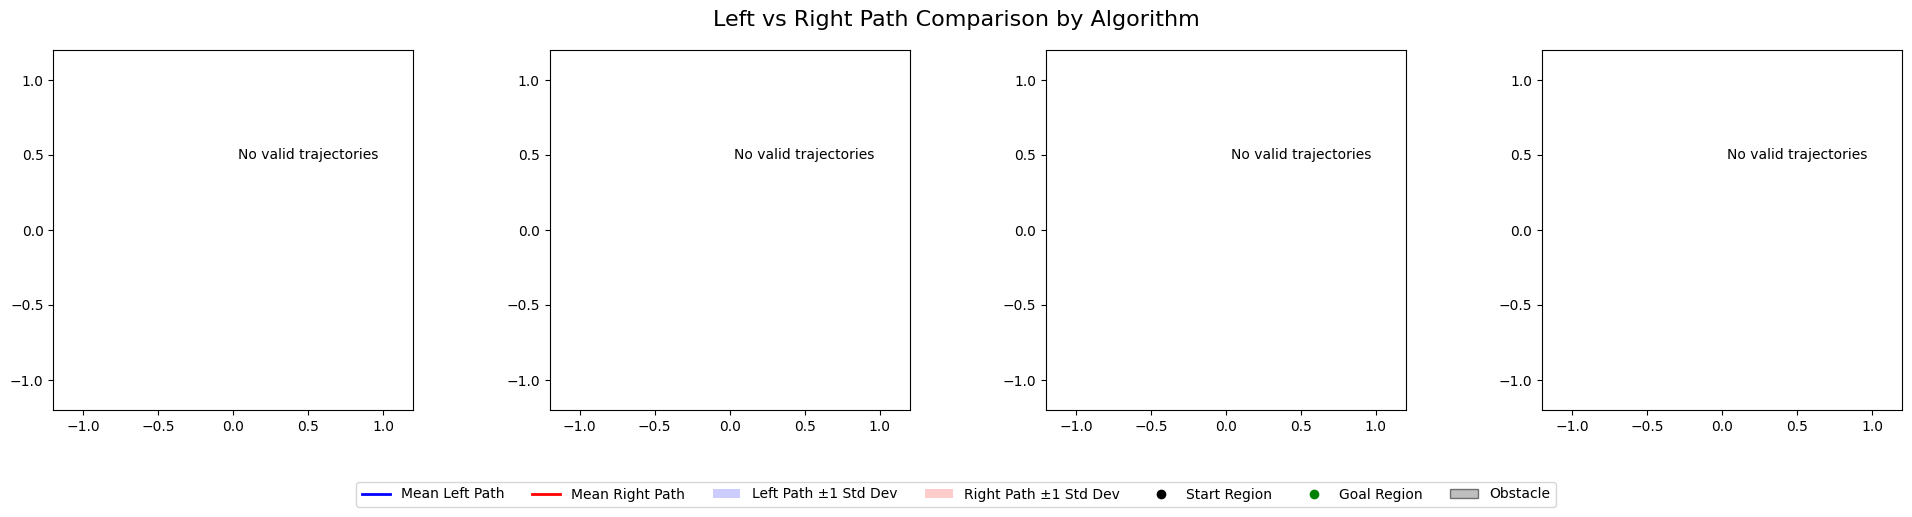

In [26]:
def compare_left_right_paths_by_algorithm():
    """
    Compare left and right trajectory paths across all algorithms in a 1x4 subplot.
    Each subplot shows both left and right paths for a single algorithm.
    """
    algorithms = ["DDPG", "SAC", "TD3", "ExpD3"]
    seeds = [0, 1, 2, 3]
    
    # Create a 1x4 subplot layout
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Dictionary to store statistics for final comparison
    all_stats = {}
    
    for i, algorithm in enumerate(algorithms):
        ax = axes[i]
        
        # Get all trajectory files for this algorithm across all seeds
        all_files = []
        for seed in seeds:
            trajectory_files = glob.glob(f"./runs/trajectories/{algorithm}/seed{seed}/*_trajectories.npz")
            if not trajectory_files:
                continue
                
            # Sort files numerically
            trajectory_files.sort(key=lambda x: int(os.path.basename(x).split('_')[0]))
            
            # Use only last 5 episodes (trained model)
            last_episodes = min(5, len(trajectory_files))
            all_files.extend(trajectory_files[-last_episodes:])
        
        # Calculate statistics with path classification
        stats = classify_trajectory_paths(all_files)
        all_stats[algorithm] = stats
        
        # Plot both left and right paths on the same subplot
        plot_combined_paths_on_axis(ax, stats, algorithm)
    
    # Add a single legend for the entire figure
    legend_elements = [
        plt.Line2D([0], [0], color='blue', linewidth=2, label='Mean Left Path'),
        plt.Line2D([0], [0], color='red', linewidth=2, label='Mean Right Path'),
        plt.Rectangle((0, 0), 1, 1, facecolor='blue', alpha=0.2, edgecolor=None, label='Left Path ±1 Std Dev'),
        plt.Rectangle((0, 0), 1, 1, facecolor='red', alpha=0.2, edgecolor=None, label='Right Path ±1 Std Dev'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Start Region'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Goal Region'),
        plt.Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.5, edgecolor='black', label='Obstacle')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=7)
    
    plt.suptitle("Left vs Right Path Comparison by Algorithm", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.18)  # Make room for the legend at the bottom
    
    # Save the comparison
    plt.savefig("./runs/images/trajectories_comparison.png", dpi=300, bbox_inches='tight')
    #plt.show()
    
    # Create a summary table of statistics
    #create_left_right_statistics_table(all_stats, algorithms)
    
    return all_stats

def plot_combined_paths_on_axis(ax, stats, algorithm_name):
    """
    Helper function to plot both left and right path statistics on a given axis.
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axis to plot on
    stats : dict
        Dictionary containing trajectory statistics for left and right paths
    algorithm_name : str
        Name of the algorithm for the title
    """
    if (stats['all'] is None or stats['all']['num_trajectories'] == 0):
        ax.text(0.5, 0.5, "No valid trajectories", ha='center', va='center')
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_aspect('equal')
        return
    
    # Plot left paths if available
    if stats['left'] is not None and stats['left']['num_trajectories'] > 0:
        # Plot some sample trajectories with low alpha
        left_trajectories = stats['left']['all_trajectories']
        max_background_trajectories = min(10, len(left_trajectories))
        indices = np.linspace(0, len(left_trajectories)-1, max_background_trajectories, dtype=int)
        for i in indices:
            ax.plot(left_trajectories[i, :, 0], left_trajectories[i, :, 1], 'b-', alpha=0.1)
        
        # Plot mean and variance
        mean_traj = stats['left']['mean_trajectory']
        std_traj = stats['left']['std_trajectory']
        ax.plot(mean_traj[:, 0], mean_traj[:, 1], 'b-', linewidth=2)
        ax.fill_between(
            mean_traj[:, 0],
            mean_traj[:, 1] - std_traj[:, 1],
            mean_traj[:, 1] + std_traj[:, 1],
            alpha=0.2, color='blue'
        )
    
    # Plot right paths if available
    if stats['right'] is not None and stats['right']['num_trajectories'] > 0:
        # Plot some sample trajectories with low alpha
        right_trajectories = stats['right']['all_trajectories']
        max_background_trajectories = min(10, len(right_trajectories))
        indices = np.linspace(0, len(right_trajectories)-1, max_background_trajectories, dtype=int)
        for i in indices:
            ax.plot(right_trajectories[i, :, 0], right_trajectories[i, :, 1], 'r-', alpha=0.1)
        
        # Plot mean and variance
        mean_traj = stats['right']['mean_trajectory']
        std_traj = stats['right']['std_trajectory']
        ax.plot(mean_traj[:, 0], mean_traj[:, 1], 'r-', linewidth=2)
        ax.fill_between(
            mean_traj[:, 0],
            mean_traj[:, 1] - std_traj[:, 1],
            mean_traj[:, 1] + std_traj[:, 1],
            alpha=0.2, color='red'
        )
    
    # Add environment elements
    circle1 = Circle((-1, 0), 0.1, color='black', fill=False, linestyle='--')
    ax.add_patch(circle1)
    
    circle2 = Circle((1, 0), 0.15, color='green', fill=False, linestyle='--')
    ax.add_patch(circle2)
    
    rect_width, rect_height = 0.2, 0.5
    rectangle = Rectangle((-rect_width/2, -rect_height/2), rect_width, rect_height, 
                         edgecolor='black', facecolor='gray', alpha=0.5)
    ax.add_patch(rectangle)
    
    # Calculate ratio of left vs right
    total = stats['all']['num_trajectories']
    left_count = stats['left']['num_trajectories'] if stats['left'] is not None else 0
    right_count = stats['right']['num_trajectories'] if stats['right'] is not None else 0
    left_percent = left_count / total * 100 if total > 0 else 0
    right_percent = right_count / total * 100 if total > 0 else 0
    
    # Add statistics text
    stats_text = [
        f"Total: {total}",
        f"Left: {left_count} ({left_percent:.1f}%)",
        f"Right: {right_count} ({right_percent:.1f}%)"
    ]
    
    ax.text(0.02, 0.98, "\n".join(stats_text), transform=ax.transAxes, fontsize=9, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Set plot properties
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title(f"{algorithm_name}")
    ax.grid(True, linestyle='--', alpha=0.4)

compare_left_right_paths_by_algorithm()